In [12]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [13]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [14]:
NUM_CLASSES = 32

# 学習データ読み込み

In [15]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [16]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [19]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 42)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                860       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 32)                352       
                                                                 
Total params: 1422 (5.55 KB)
Trainable params: 1422 (5.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [21]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [22]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/8 [==>...........................] - ETA: 4s - loss: 3.4628 - accuracy: 0.0156
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 1s 74ms/step - loss: 3.4557 - accuracy: 0.0363 - val_loss: 3.4455 - val_accuracy: 0.0652
Epoch 2/1000
1/8 [==>...........................] - ETA: 0s - loss: 3.4566 - accuracy: 0.0391
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 11ms/step - loss: 3.4440 - accuracy: 0.0467 - val_loss: 3.4367 - val_accuracy: 0.0528
Epoch 3/1000
1/8 [==>...........................] - ETA: 0s - loss: 3.4281 - accuracy: 0.0625

C:\Users\happy\Documents\hand-gesture-recognition-mediapipe\venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 13ms/step - loss: 3.4395 - accuracy: 0.0405 - val_loss: 3.4252 - val_accuracy: 0.0559
Epoch 4/1000
1/8 [==>...........................] - ETA: 0s - loss: 3.4198 - accuracy: 0.0391
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 13ms/step - loss: 3.4149 - accuracy: 0.0581 - val_loss: 3.4108 - val_accuracy: 0.0683
Epoch 5/1000
1/8 [==>...........................] - ETA: 0s - loss: 3.4037 - accuracy: 0.0625
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 12ms/step - loss: 3.4127 - accuracy: 0.0498 - val_loss: 3.3943 - val_accuracy: 0.1087
Epoch 6/1000
1/8 [==>...........................] - ETA: 0s - loss: 3.3737 - accuracy: 0.0703
Epoch 6: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [========================

In [23]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 [==============================] - 0s 3ms/step - loss: 0.9632 - accuracy: 0.7547


In [24]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [25]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 99ms/step
[6.6355753e-13 5.1568104e-14 2.3915420e-19 9.3408659e-07 1.4785487e-05
 2.2662779e-04 1.7152823e-05 1.7270684e-06 2.5151585e-05 2.4463782e-09
 1.1639062e-04 8.0998667e-05 5.0607876e-05 1.0085421e-09 9.5589865e-09
 2.6901299e-04 4.4655160e-05 2.8152931e-02 9.6022130e-05 2.1484952e-09
 7.2315071e-10 1.7504815e-22 1.6408800e-20 2.3275592e-07 5.0199816e-22
 2.3408122e-03 6.3178048e-12 2.4081345e-08 2.1222632e-04 5.6721863e-11
 1.1406833e-12 9.6834981e-01]
31


# 混同行列

11/11 [==============================] - 0s 1ms/step


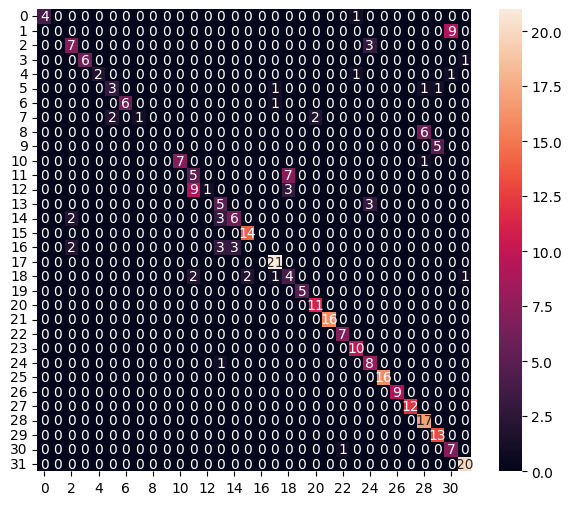

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.00      0.00      0.00         9
           2       0.64      0.70      0.67        10
           3       1.00      0.86      0.92         7
           4       1.00      0.50      0.67         4
           5       0.60      0.50      0.55         6
           6       1.00      0.86      0.92         7
           7       1.00      0.20      0.33         5
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         5
          10       1.00      0.88      0.93         8
          11       0.31      0.42      0.36        12
          12       1.00      0.08      0.14        13
          13       0.42      0.62      0.50         8
          14       0.67      0.55      0.60        11
          15       0.88      1.00      0.93        14
          16       0.00      0.00      0.00         8
     

C:\Users\happy\Documents\hand-gesture-recognition-mediapipe\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\happy\Documents\hand-gesture-recognition-mediapipe\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\happy\Documents\hand-gesture-recognition-mediapipe\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [27]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

C:\Users\happy\Documents\hand-gesture-recognition-mediapipe\venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\happy\AppData\Local\Temp\tmpt4l3yft_\assets


INFO:tensorflow:Assets written to: C:\Users\happy\AppData\Local\Temp\tmpt4l3yft_\assets


7804

# 推論テスト

In [29]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [30]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [31]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [32]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 2 ms


In [33]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[6.6355889e-13 5.1568199e-14 2.3915420e-19 9.3408750e-07 1.4785487e-05
 2.2662801e-04 1.7152837e-05 1.7270718e-06 2.5151581e-05 2.4463827e-09
 1.1639061e-04 8.0998667e-05 5.0607920e-05 1.0085459e-09 9.5590043e-09
 2.6901346e-04 4.4655208e-05 2.8152950e-02 9.6022210e-05 2.1484909e-09
 7.2315065e-10 1.7504746e-22 1.6408863e-20 2.3275634e-07 5.0200008e-22
 2.3408164e-03 6.3178282e-12 2.4081343e-08 2.1222631e-04 5.6722085e-11
 1.1406834e-12 9.6834981e-01]
31
